In [2]:
import pandas as pd
import re

df = pd.read_csv('newdata.csv')  

def preprocess_text(text):
   
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text
df['processed_text'] = df['v2'].apply(preprocess_text)

# print(df.head())
df = df.rename(columns={'v1':'label','v2':'Text'})
df.head().drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis =1)

,label,Text,processed_text
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling its been 3 weeks now...
2,spam,WINNER!! As a valued network customer you have...,winner as a valued network customer you have b...
3,spam,Had your mobile 11 months or more? U R entitle...,had your mobile 11 months or more u r entitled...
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",six chances to win cash from 100 to 20000 poun...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['processed_text'])

y = df['label'] 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [5]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")
print("Classification Report:")
print(report)

Accuracy: 92.90123456790124
Classification Report:
              precision    recall  f1-score   support

         ham       0.88      0.99      0.93       162
        spam       0.99      0.86      0.92       162

    accuracy                           0.93       324
   macro avg       0.94      0.93      0.93       324
weighted avg       0.94      0.93      0.93       324



In [6]:
new_messages = [
    "Claim your free gift now!",
    "call me whwnever you are free" 
]

processed_new_messages = [preprocess_text(msg) for msg in new_messages]

X_new = vectorizer.transform(processed_new_messages)

predictions = clf.predict(X)
df['predictions'] = predictions
total_messages = len(df)
spam_count = df[df['predictions'] == 'spam'].shape[0]
ham_count = df[df['predictions'] == 'ham'].shape[0]


print("Predictions for new messages:")
for msg, prediction in zip(new_messages, predictions):
    print(f"Message: {msg} - Prediction: {'spam' if prediction == 'spam' else 'ham'}")
  

Predictions for new messages:
Message: Claim your free gift now! - Prediction: spam
Message: call me whwnever you are free - Prediction: ham


In [7]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")
print("the spam count is: ",spam_count)
print("the ham count is: ",ham_count)
print("Classification Report:")
print(report)

spam_percentage = (spam_count / total_messages) * 100
ham_percentage = (ham_count / total_messages) * 100

print(f"Total messages: {total_messages}")
print(f"Spam percentage: {spam_percentage:.2f}%")
print(f"Ham percentage: {ham_percentage:.2f}%")



Accuracy: 92.90123456790124
the spam count is:  700
the ham count is:  919
Classification Report:
              precision    recall  f1-score   support

         ham       0.88      0.99      0.93       162
        spam       0.99      0.86      0.92       162

    accuracy                           0.93       324
   macro avg       0.94      0.93      0.93       324
weighted avg       0.94      0.93      0.93       324

Total messages: 1619
Spam percentage: 43.24%
Ham percentage: 56.76%


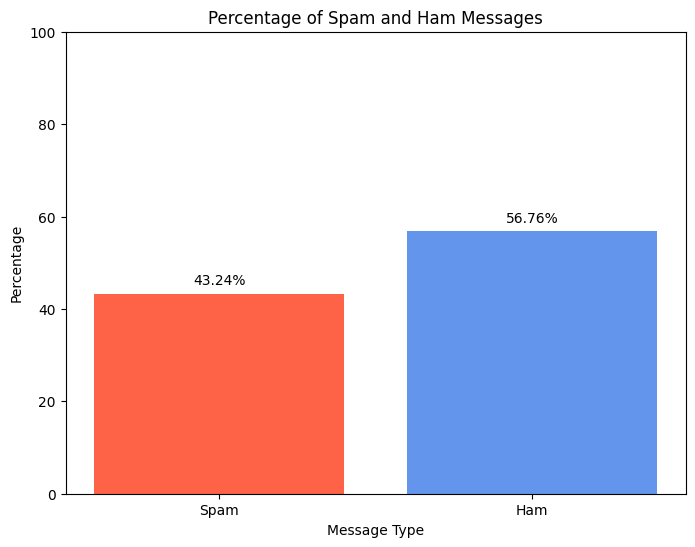

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
labels = ['Spam', 'Ham']
percentages = [spam_percentage, ham_percentage]
colors = ['#FF6347', '#6495ED']

plt.bar(labels, percentages, color=colors)
plt.xlabel('Message Type')
plt.ylabel('Percentage')
plt.title('Percentage of Spam and Ham Messages')
plt.ylim(0, 100)

for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 2, f'{percentage:.2f}%', ha='center', color='black')

plt.show()